# Scikit-learn

![img](imgs/scikit_learn_1.PNG)

In [3]:
import os
import numpy as np
import pandas as pd
import sklearn

In [4]:
!pip install scikit-learn

^C


# classification

### 데이터 읽기 (Titanic dataset)
https://www.kaggle.com/c/titanic/overview

In [5]:
data_path = './data/titanic/'

train_data_path = os.path.join(data_path, 'train.csv') # './data/titanic/train.csv'
test_data_path = os.path.join(data_path, 'test.csv')

train_df = pd.read_csv(train_data_path)
test_df = pd.read_csv(test_data_path)

In [4]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
"""
test data에는 label(Survivded)이 존재하지 않습니다.
따라서, 이번 실습에서는 모든 label이 제공되는 train dataset을 이용해 train / validation / test 데이터셋으로 구분하여 진행하도록 하겠습니다.
"""

test_df.head() 

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### 데이터 전처리

![](imgs/titanic_features.PNG)

In [6]:
# 1. 사용할 feature만 indexing해줍니다.
input_features = ['Pclass', 'Sex', 'Age', 'SibSp','Parch', 'Fare', 'Cabin', 'Embarked']
output_features = ['Survived']

X = train_df[input_features]
y = train_df[output_features]

In [7]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,22.0,1,0,7.2500,NaN,S
1,1,female,38.0,1,0,71.2833,C85,C
2,3,female,26.0,0,0,7.9250,NaN,S
3,1,female,35.0,1,0,53.1000,C123,S
4,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,NaN,S
887,1,female,19.0,0,0,30.0000,B42,S
888,3,female,NaN,1,2,23.4500,NaN,S
889,1,male,26.0,0,0,30.0000,C148,C


In [8]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [9]:
# 2. float 로 표시할 수 없는 값들을 모델에 입력 가능한 값으로 변환해줍니다.

# 2-1. nan 값 처리 - 여기서는 -1 값을 입력하도록 하겠습니다.
X = X.fillna(-1)


# 2-2. category로 표시 가능한 값들은 0부터 시작하는 index로 변환해줍니다.
X['Sex'] = X['Sex'].astype('category').cat.codes
X['Cabin'] = X['Cabin'].astype('category').cat.codes
X['Embarked'] = X['Embarked'].astype('category').cat.codes

In [10]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.0,1,0,7.2500,0,3
1,1,0,38.0,1,0,71.2833,82,1
2,3,0,26.0,0,0,7.9250,0,3
3,1,0,35.0,1,0,53.1000,56,3
4,3,1,35.0,0,0,8.0500,0,3
...,...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,0,3
887,1,0,19.0,0,0,30.0000,31,3
888,3,0,-1.0,1,2,23.4500,0,3
889,1,1,26.0,0,0,30.0000,61,1


In [11]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


### 학습 데이터 train / validation / test split

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [14]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((569, 8), (569, 1), (143, 8), (143, 1), (179, 8), (179, 1))

### 모델 선정 및 학습
https://scikit-learn.org/stable/supervised_learning.html#supervised-learning

In [15]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression() # 모델 선정
model.fit(X_train, y_train) # 모델 학습

c:\users\wooya2075\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\wooya2075\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [16]:
pred = model.predict(X_val) # 모델 예측

In [17]:
X_val

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
373,1,1,22.0,0,0,135.6333,0,1
848,2,1,28.0,0,1,33.0000,0,3
593,3,0,-1.0,0,2,7.7500,0,2
237,2,0,8.0,0,2,26.2500,0,3
36,3,1,-1.0,0,0,7.2292,0,1
...,...,...,...,...,...,...,...,...
516,2,0,34.0,0,0,10.5000,143,3
101,3,1,-1.0,0,0,7.8958,0,3
783,3,1,-1.0,1,2,23.4500,0,3
648,3,1,-1.0,0,0,7.5500,0,3


In [18]:
pred

array([1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1], dtype=int64)

In [19]:
model.score(X_val, y_val) # validation 성능 측정

0.7762237762237763

In [20]:
model.score(X_test, y_test) # test 성능 측정

0.7932960893854749

- 다른 모델을 구현해봅시다.

In [21]:
# Support vector machine
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)

c:\users\wooya2075\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [22]:
model.score(X_val, y_val)

0.6503496503496503

In [23]:
model.score(X_test, y_test)

0.6983240223463687

# Regression

### 데이터 읽기 (house prices 데이터셋)
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview

In [24]:
data_path = './data/house-prices-advanced-regression-techniques/'

train_df = pd.read_csv(os.path.join(data_path, 'train.csv'))
test_df = pd.read_csv(os.path.join(data_path, 'test.csv'))

In [25]:
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [26]:
test_df # 타이타닉 데이터셋과 마찬가지로 label(SalePrice)이 없기 때문에 학습데이터를 이용하여 실습하도록 하겠습니다.

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


### 데이터 전처리

In [27]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [28]:
train_df = train_df.fillna(-1) # nan 값으로 -1을 채워주겠습니다.

In [29]:
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,-1,Reg,Lvl,AllPub,...,0,-1,-1,-1,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,-1,Reg,Lvl,AllPub,...,0,-1,-1,-1,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,-1,IR1,Lvl,AllPub,...,0,-1,-1,-1,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,-1,IR1,Lvl,AllPub,...,0,-1,-1,-1,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,-1,IR1,Lvl,AllPub,...,0,-1,-1,-1,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,-1,Reg,Lvl,AllPub,...,0,-1,-1,-1,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,-1,Reg,Lvl,AllPub,...,0,-1,MnPrv,-1,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,-1,Reg,Lvl,AllPub,...,0,-1,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,-1,Reg,Lvl,AllPub,...,0,-1,-1,-1,0,4,2010,WD,Normal,142125


In [30]:
# float value 혹은 categorical의 형태로 만들어줍니다.
for column in train_df.columns:
    if train_df[column].dtype == 'object':
        train_df[column] = train_df[column].astype('category').cat.codes

In [31]:
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,0,3,3,0,...,0,0,0,0,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,0,3,3,0,...,0,0,0,0,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,0,0,3,0,...,0,0,0,0,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,0,0,3,0,...,0,0,0,0,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,0,0,3,0,...,0,0,0,0,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,62.0,7917,1,0,3,3,0,...,0,0,0,0,0,8,2007,8,4,175000
1456,1457,20,3,85.0,13175,1,0,3,3,0,...,0,0,3,0,0,2,2010,8,4,210000
1457,1458,70,3,66.0,9042,1,0,3,3,0,...,0,0,1,3,2500,5,2010,8,4,266500
1458,1459,20,3,68.0,9717,1,0,3,3,0,...,0,0,0,0,0,4,2010,8,4,142125


In [32]:
# input feature 와 output feature를 구분해줍니다.
X = train_df[[i for i in train_df.columns if i not in ['SalePrice', 'Id']]]
y = train_df[['SalePrice']]

In [33]:
X

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,3,65.0,8450,1,0,3,3,0,4,...,0,0,0,0,0,0,2,2008,8,4
1,20,3,80.0,9600,1,0,3,3,0,2,...,0,0,0,0,0,0,5,2007,8,4
2,60,3,68.0,11250,1,0,0,3,0,4,...,0,0,0,0,0,0,9,2008,8,4
3,70,3,60.0,9550,1,0,0,3,0,0,...,0,0,0,0,0,0,2,2006,8,0
4,60,3,84.0,14260,1,0,0,3,0,2,...,0,0,0,0,0,0,12,2008,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,3,62.0,7917,1,0,3,3,0,4,...,0,0,0,0,0,0,8,2007,8,4
1456,20,3,85.0,13175,1,0,3,3,0,4,...,0,0,0,3,0,0,2,2010,8,4
1457,70,3,66.0,9042,1,0,3,3,0,4,...,0,0,0,1,3,2500,5,2010,8,4
1458,20,3,68.0,9717,1,0,3,3,0,4,...,0,0,0,0,0,0,4,2010,8,4


In [34]:
y

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


### 데이터 스플릿

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [36]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((934, 79), (934, 1), (234, 79), (234, 1), (292, 79), (292, 1))

### 데이터 standardization

In [37]:
from sklearn.preprocessing import StandardScaler
scalerX = StandardScaler()
scalerY = StandardScaler()

In [38]:
scalerX.fit(X_train)
scalerY.fit(y_train)

StandardScaler()

In [39]:
scalerX.mean_, scalerX.var_

(array([5.71788009e+01, 3.05032120e+00, 5.67858672e+01, 1.07702602e+04,
        9.96788009e-01, 9.20770878e-02, 1.92719486e+00, 2.78800857e+00,
        1.07066381e-03, 2.93790150e+00, 6.53104925e-02, 1.22708779e+01,
        2.01070664e+00, 2.01284797e+00, 4.83940043e-01, 3.05674518e+00,
        6.10706638e+00, 5.60278373e+00, 1.97042291e+03, 1.98473448e+03,
        1.43897216e+00, 1.06852248e+00, 9.65096360e+00, 1.03982869e+01,
        2.74411135e+00, 1.03765525e+02, 2.53854390e+00, 3.70556745e+00,
        1.40149893e+00, 3.20021413e+00, 3.71734475e+00, 3.19700214e+00,
        3.62098501e+00, 4.52292291e+02, 5.60064240e+00, 4.38608137e+01,
        5.65693790e+02, 1.06184690e+03, 1.03961456e+00, 1.57387580e+00,
        9.28265525e-01, 4.68629550e+00, 1.16972805e+03, 3.54776231e+02,
        5.56852248e+00, 1.53007281e+03, 4.23982869e-01, 6.20985011e-02,
        1.56745182e+00, 3.77944325e-01, 2.90256959e+00, 1.04710921e+00,
        2.33618844e+00, 6.59528908e+00, 5.71948608e+00, 6.295503

In [40]:
scalerY.mean_, scalerY.var_

(array([181034.54068522]), array([5.83864132e+09]))

In [41]:
X

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,3,65.0,8450,1,0,3,3,0,4,...,0,0,0,0,0,0,2,2008,8,4
1,20,3,80.0,9600,1,0,3,3,0,2,...,0,0,0,0,0,0,5,2007,8,4
2,60,3,68.0,11250,1,0,0,3,0,4,...,0,0,0,0,0,0,9,2008,8,4
3,70,3,60.0,9550,1,0,0,3,0,0,...,0,0,0,0,0,0,2,2006,8,0
4,60,3,84.0,14260,1,0,0,3,0,2,...,0,0,0,0,0,0,12,2008,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,3,62.0,7917,1,0,3,3,0,4,...,0,0,0,0,0,0,8,2007,8,4
1456,20,3,85.0,13175,1,0,3,3,0,4,...,0,0,0,3,0,0,2,2010,8,4
1457,70,3,66.0,9042,1,0,3,3,0,4,...,0,0,0,1,3,2500,5,2010,8,4
1458,20,3,68.0,9717,1,0,3,3,0,4,...,0,0,0,0,0,0,4,2010,8,4


In [42]:
scalerX.transform(X_train)

array([[ 1.47985578,  1.6010074 , -0.35717437, ..., -0.61356592,
         0.31211722, -0.70221326],
       [ 3.12881992, -0.08483354,  0.50881346, ...,  1.63966044,
         0.31211722,  0.21380236],
       [ 1.47985578, -0.08483354, -1.61425349, ..., -1.36464138,
         0.31211722,  0.21380236],
       ...,
       [-0.87580728, -0.08483354,  0.36913801, ..., -0.61356592,
         0.31211722,  0.21380236],
       [ 0.06645795, -0.08483354,  0.64848892, ..., -0.61356592,
         0.31211722,  0.21380236],
       [-0.87580728, -0.08483354,  0.89990474, ...,  1.63966044,
         0.31211722,  0.21380236]])

In [43]:
scalerX.transform(X)

array([[ 0.06645795, -0.08483354,  0.22946255, ...,  0.13750953,
         0.31211722,  0.21380236],
       [-0.87580728, -0.08483354,  0.64848892, ..., -0.61356592,
         0.31211722,  0.21380236],
       [ 0.06645795, -0.08483354,  0.31326782, ...,  0.13750953,
         0.31211722,  0.21380236],
       ...,
       [ 0.30202425, -0.08483354,  0.25739764, ...,  1.63966044,
         0.31211722,  0.21380236],
       [-0.87580728, -0.08483354,  0.31326782, ...,  1.63966044,
         0.31211722,  0.21380236],
       [-0.87580728, -0.08483354,  0.50881346, ...,  0.13750953,
         0.31211722,  0.21380236]])

In [44]:
pd.DataFrame(scalerX.transform(X_train))

,0,1,2,3,4,5,6,7,8,9,...,69,70,71,72,73,74,75,76,77,78
0,1.479856,1.601007,-0.357174,-0.519536,0.056766,-0.248646,-1.363810,-2.581616,-0.032739,0.639735,...,2.508497,-0.07944,-0.074409,-0.458609,-0.203736,-0.119024,2.092541,-0.613566,0.312117,-0.702213
1,3.128820,-0.084834,0.508813,0.073762,0.056766,-0.248646,0.759188,0.306084,-0.032739,0.639735,...,-0.275752,-0.07944,-0.074409,-0.458609,-0.203736,-0.119024,-0.886778,1.639660,0.312117,0.213802
2,1.479856,-0.084834,-1.614253,-0.653643,0.056766,-0.248646,0.759188,0.306084,-0.032739,0.639735,...,-0.275752,-0.07944,-0.074409,-0.458609,-0.203736,-0.119024,-0.514363,-1.364641,0.312117,0.213802
3,0.773157,-0.084834,0.676424,0.092403,-17.616280,-0.248646,0.759188,0.306084,-0.032739,0.639735,...,-0.275752,-0.07944,-0.074409,-0.458609,-0.203736,-0.119024,-0.514363,-0.613566,0.312117,0.213802
4,1.479856,-0.084834,-0.692395,0.006536,0.056766,-0.248646,-1.363810,0.306084,-0.032739,-1.167259,...,-0.275752,-0.07944,-0.074409,-0.458609,-0.203736,-0.119024,-0.514363,0.137510,-3.540537,0.213802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
929,-0.875807,-0.084834,0.089787,-0.328817,0.056766,-0.248646,0.759188,0.306084,-0.032739,0.639735,...,-0.275752,-0.07944,-0.074409,-0.458609,4.939211,1.331129,1.720126,0.888585,0.312117,0.213802
930,-0.875807,-0.084834,0.229463,-0.172877,0.056766,-0.248646,-1.363810,0.306084,-0.032739,0.639735,...,-0.275752,-0.07944,-0.074409,-0.458609,-0.203736,-0.119024,0.230467,-1.364641,-0.972101,1.129818
931,-0.875807,-0.084834,0.369138,-0.289120,0.056766,-0.248646,0.759188,0.306084,-0.032739,0.639735,...,-0.275752,-0.07944,-0.074409,-0.458609,-0.203736,-0.119024,-0.886778,-0.613566,0.312117,0.213802
932,0.066458,-0.084834,0.648489,-0.087183,0.056766,-0.248646,0.759188,0.306084,-0.032739,0.639735,...,-0.275752,-0.07944,-0.074409,3.453178,-0.203736,-0.119024,0.230467,-0.613566,0.312117,0.213802


In [45]:
pd.DataFrame(scalerY.transform(y_train))

,0
0,0.706252
1,-0.648265
2,0.444510
3,-0.818397
4,1.871006
...,...
929,-0.792223
930,-0.209977
931,-0.641721
932,0.078071


### 모델 선정 및 학습

In [46]:
from sklearn.linear_model import LinearRegression
model = LinearRegression() # 모델 선정
model.fit(scalerX.transform(X_train), scalerY.transform(y_train)) # 모델 학습

LinearRegression()

In [47]:
def mae(x,y):
    return np.mean(np.abs(x-y))

In [48]:
model.predict(X_val)

c:\users\wooya2075\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:439: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([[ 6.52133390e+13],
       [ 1.14098999e+13],
       [ 1.23090713e+14],
       [ 1.09941456e+14],
       [ 7.63058788e+14],
       [ 5.84591300e+13],
       [-6.48284854e+13],
       [ 4.84808987e+14],
       [ 3.52199245e+13],
       [ 6.67407702e+13],
       [ 7.03755494e+13],
       [-4.57625799e+13],
       [ 1.01657479e+14],
       [ 3.27668193e+13],
       [-5.78943065e+12],
       [ 3.64109413e+12],
       [ 9.02557377e+14],
       [ 7.78878899e+13],
       [ 1.86339862e+13],
       [-2.61790484e+13],
       [ 1.88980150e+13],
       [-6.92648059e+13],
       [ 5.91908735e+14],
       [ 1.10009463e+14],
       [-1.15303189e+13],
       [ 3.89018355e+13],
       [ 4.59031583e+12],
       [ 7.96694097e+13],
       [ 6.28958087e+12],
       [ 8.34891498e+13],
       [-3.54858501e+11],
       [-8.36243471e+13],
       [ 5.03104963e+13],
       [ 1.09288058e+14],
       [ 1.73037622e+13],
       [ 4.59753140e+14],
       [-3.72677702e+13],
       [ 1.11474272e+13],
       [ 2.1

In [49]:
model.predict(scalerX.transform(X_val))

array([[-0.59486945],
       [ 0.17138963],
       [ 1.32011415],
       [ 0.75872442],
       [-0.12463047],
       [-0.99651535],
       [ 1.41272537],
       [-0.40180586],
       [-0.99182306],
       [-0.57301305],
       [ 0.18439766],
       [ 0.74149569],
       [ 0.24218577],
       [ 0.22772789],
       [ 0.88922483],
       [ 0.58419924],
       [-0.41205226],
       [ 0.53575179],
       [-0.17939647],
       [-1.05000428],
       [ 0.46929747],
       [ 0.16775699],
       [-0.26286623],
       [ 0.52522563],
       [-0.41940945],
       [ 0.31469214],
       [ 2.68736042],
       [-0.29848591],
       [-1.05617705],
       [-0.02517394],
       [ 0.09804057],
       [ 1.81015695],
       [ 0.25672266],
       [ 0.82672326],
       [-0.70579062],
       [-0.71755818],
       [-0.58943015],
       [ 0.02326628],
       [ 1.62977186],
       [-0.73451526],
       [-1.43339703],
       [-0.69369821],
       [ 1.27390831],
       [-0.88848555],
       [-1.06135559],
       [-1

In [50]:
pred = model.predict(scalerX.transform(X_val))

In [51]:
pred_unscaled = scalerY.inverse_transform(pred)

In [52]:
pred_unscaled

array([[135579.96933592],
       [194130.59447985],
       [281905.78657791],
       [239009.43456175],
       [171511.40161611],
       [104889.80359529],
       [288982.30224281],
       [150332.15193008],
       [105248.34622679],
       [137250.03868876],
       [195124.55052071],
       [237692.96994138],
       [199540.19822122],
       [198435.45713466],
       [248981.10121004],
       [225673.79033905],
       [149549.21473373],
       [221971.87241913],
       [167326.67618455],
       [100802.66128116],
       [216894.03110726],
       [193853.02055165],
       [160948.66816426],
       [221167.55755554],
       [148987.04435515],
       [205080.48241211],
       [386378.4447689 ],
       [158226.93311025],
       [100330.99347937],
       [179110.97458405],
       [188525.91902746],
       [319350.44834293],
       [200650.97627745],
       [244205.2936779 ],
       [127104.37205931],
       [126205.20098603],
       [135995.59202747],
       [182812.34078869],
       [3055

In [53]:
mae(pred_unscaled, y_val)

SalePrice    19871.548201
dtype: float64

In [54]:
# scaler 가 없는 상태로 학습해봅시다.
model = LinearRegression() # 모델 선정
model.fit(X_train, y_train) # 모델 학습
pred = model.predict(X_val)
mae(pred, y_val)

# 결과가 거의 비슷한 이유가 무엇일까요?

SalePrice    19877.463545
dtype: float64

In [55]:
# 다른 모델을 구현해봅시다.
from sklearn.linear_model import Ridge

# scaler 가 없는 상태
model = Ridge() # 모델 선정
model.fit(X_train, y_train) # 모델 학습
pred = model.predict(X_val)
mae(pred, y_val)

SalePrice    19958.486296
dtype: float64

In [56]:
# scaler 를 포함한 상태
model = Ridge() # 모델 선정
model.fit(scalerX.transform(X_train), scalerY.transform(y_train)) # 모델 학습
pred = model.predict(scalerX.transform(X_val))
mae(scalerY.inverse_transform(pred), y_val)

SalePrice    19853.867262
dtype: float64

# Clustering

### Numpy 를 이용한 K-means clustering

In [57]:
# 데이터셋 샘플 생성
N = 1000
data1 = np.random.randn(N//3,2) + np.array([5,6])
data2 = np.random.randn(N//3,2) + np.array([-5,-6])
data3 = np.random.randn(N//3,2) + np.array([-10,3])
data = np.concatenate((data1, data2, data3))


In [58]:
data

array([[  5.62568754,   7.82321549],
       [  7.17332621,   7.45908675],
       [  3.92025203,   5.1653741 ],
       ...,
       [-10.78392223,   3.49762959],
       [-10.75642067,   3.11606274],
       [-10.44604597,   4.46787409]])

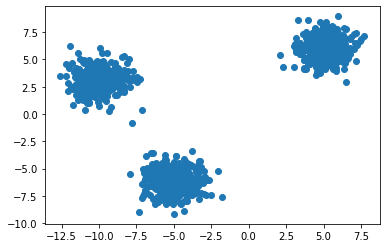

In [59]:
import matplotlib.pyplot as plt

plt.scatter(data[:,0],data[:,1])
plt.show()

### K-means clustering 알고리즘 구현

#### 1. random initialization

In [1]:
K=2
labels = np.random.randint(0,K,data.shape[0])

NameError: name 'np' is not defined

In [2]:
labels

NameError: name 'labels' is not defined

In [71]:
import matplotlib.pyplot as plt

def plot_cluster(data, labels, title=None):
    colors = ['orange','blue','green', 'gray', 'olive', 'red', 'purple', 'cyan']
    for i,c in enumerate(colors):
        data_i = data[labels==i]
        plt.scatter(data_i[:,0],data_i[:,1], c=colors[i])
        
    if title is not None:
        plt.title(title)
    plt.show()


In [72]:
def calculate_means(data, labels, K):
    means = []
    for i in range(K):
        mean_i_x = np.mean(data[labels==i,0])
        mean_i_y = np.mean(data[labels==i,1])
        means.append([mean_i_x,mean_i_y])
    means = np.array(means)
    return means

In [73]:
means = calculate_means(data,labels,K)

In [78]:
means

array([[-3.27360575,  1.27320792],
       [-3.39332616,  0.75270093]])

In [75]:
def assign_data(data, means):
    #(999, 2) data
    # (2=K, 2) means
    
    #(999, 1, 2) data - (1, K=2, 2) means
    #diff : (데이터 번호, 군집 번호, 거리)
    #data : (데이터 번호, 군집번호, 위치)
    #means :(데이터 번호, 군집번호, 위치)
    diff = data[:,None,:] - means[None,:,:] # (N,K,2) = (999, 2, 2)
    diff = np.mean(diff**2,-1) # (N,K) ((x'-x)^2 + (y'-y)^2)  #-1은 마지막 dimention을 뜻함
    
    # data 1번 -> [0.3, 0.5]
    
    labels = np.argmin(diff,-1)
    return labels

In [76]:
labels = assign_data(data,means)

In [79]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

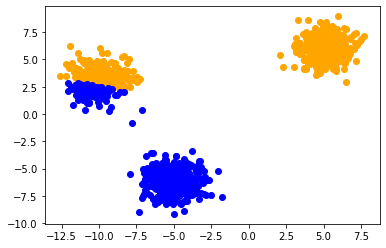

In [77]:
plot_cluster(data, labels)

#### clustering 모델 학습

In [80]:
n_iter = 20

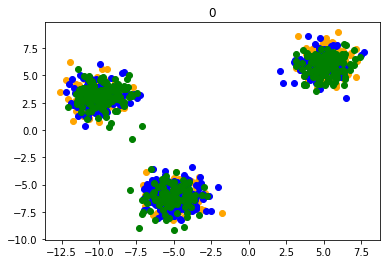

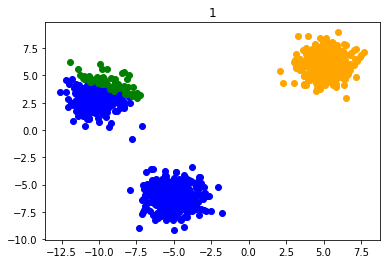

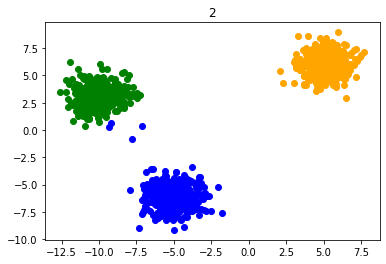

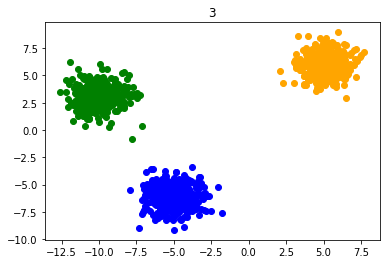

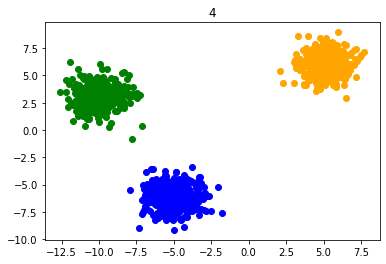

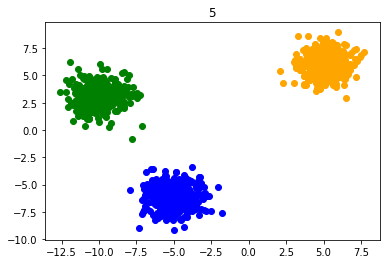

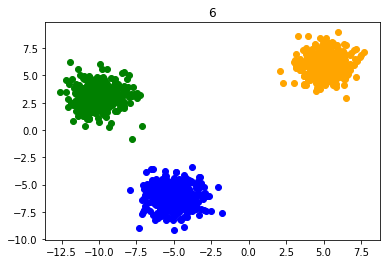

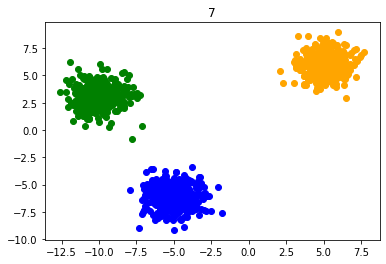

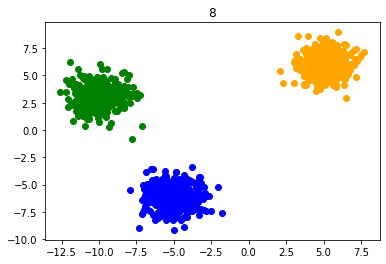

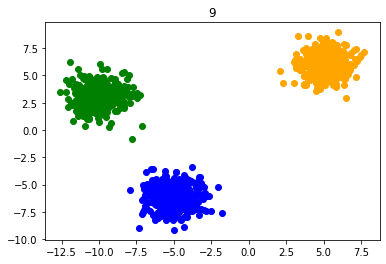

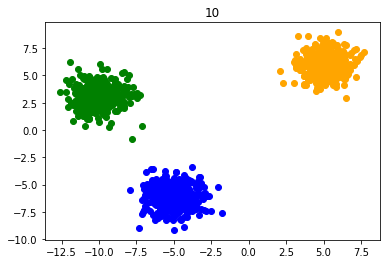

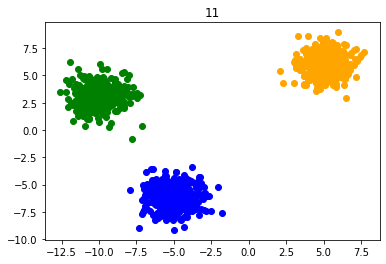

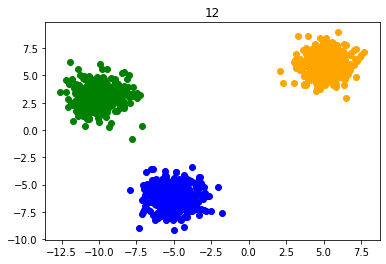

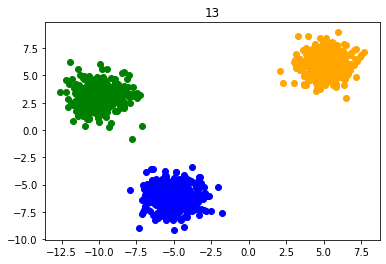

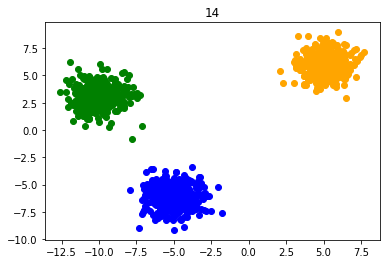

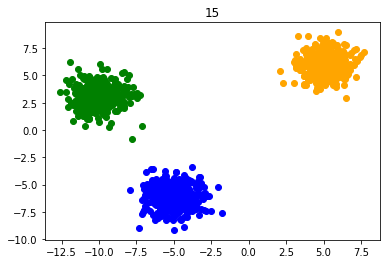

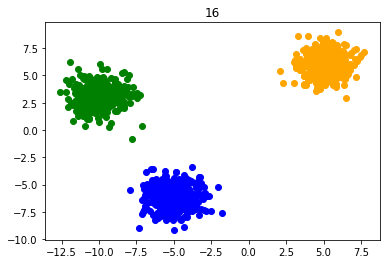

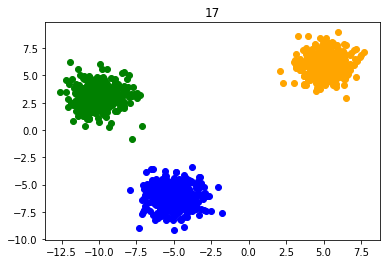

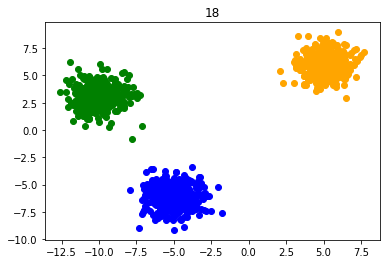

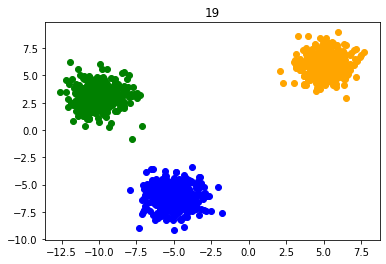

In [83]:
K=3
labels = np.random.randint(0,K,data.shape[0])

for i in range(n_iter):
    plot_cluster(data, labels, title=i)
    means = calculate_means(data,labels,K)
    labels = assign_data(data,means)
    

In [ ]:
# 다른 데이터 형태를 클러스터링 해봅시다.
N = 1000
data = np.random.randn(N,2)


In [ ]:
K=3
labels = np.random.randint(0,K,data.shape[0])

for i in range(n_iter):
    plot_cluster(data, labels, title=i)
    means = calculate_means(data,labels,K)
    labels = assign_data(data,means)
    

## Scikit-learn을 통한 clustering

### 토이 데이터셋 생성

In [84]:
from sklearn.datasets import make_blobs

# 데이터 샘플 생성
n_samples = 4000
n_components = 4

X, y_true = make_blobs(
    n_samples=n_samples, centers=n_components, cluster_std=0.60, random_state=0
)


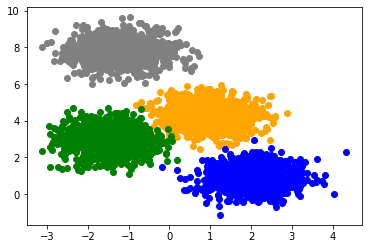

In [85]:
plot_cluster(X, y_true)

### 클러스터링 모델 학습

In [86]:
from sklearn.cluster import KMeans
# Calculate seeds from kmeans
model = KMeans(n_clusters=2, random_state=42)
y_pred = model.fit_predict(X)


### 클러스터링 결과 시각화

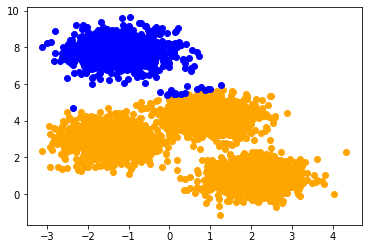

In [87]:
plot_cluster(X, y_pred)

- 다른 데이터셋을 클러스터링해봅시다!

In [88]:
#make_moons 초승달 모양만들어주는 라이브러ㅣ
from sklearn.datasets import make_moons

X, y_true = make_moons(n_samples=300, noise=0.05, random_state=42)

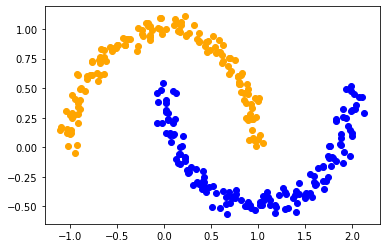

In [89]:
plot_cluster(X, y_true)

In [90]:
from sklearn.cluster import KMeans
# Calculate seeds from kmeans
model = KMeans(n_clusters=2, random_state=42)
y_pred = model.fit_predict(X)

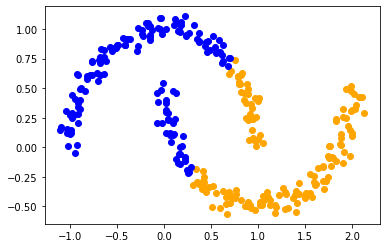

In [91]:
plot_cluster(X, y_pred)

In [92]:
from sklearn.datasets import make_circles

X, y_true = make_circles(n_samples=300)

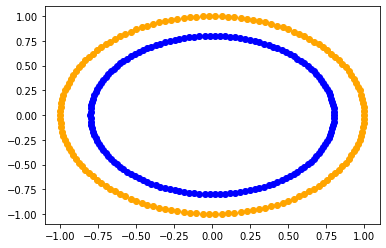

In [93]:
plot_cluster(X, y_true)

In [94]:
model = KMeans(n_clusters=2, random_state=42)
y_pred = model.fit_predict(X)

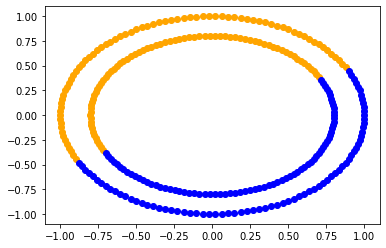

In [95]:
plot_cluster(X, y_pred)